<a href="https://colab.research.google.com/github/Haqquee/character-based-language-model/blob/main/CLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=PaCmpygFfXo&t=1764s

# Bigram Language Model

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
map = {}
for word in words:
  chars = ['.'] + list(word) + ['.']
  for char1, char2 in zip(chars, chars[1:]):
    bigram = (char1, char2)
    map[bigram] = map.get(bigram, 0) + 1

In [19]:
sorted(map.items(), key = lambda item: -item[1]);

In [5]:
#stoi lookup table
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
itos = {i+1:s for i,s in enumerate(chars)}
stoi['.'] = 0
itos[0] = '.'

In [6]:
import torch
data = torch.zeros((27, 27), dtype=torch.int32)

In [7]:
for word in words:
  chars = ['.'] + list(word) + ['.']
  for char1, char2 in zip(chars, chars[1:]):
    ix1 = stoi[char1]
    ix2 = stoi[char2]
    data[ix1, ix2] += 1

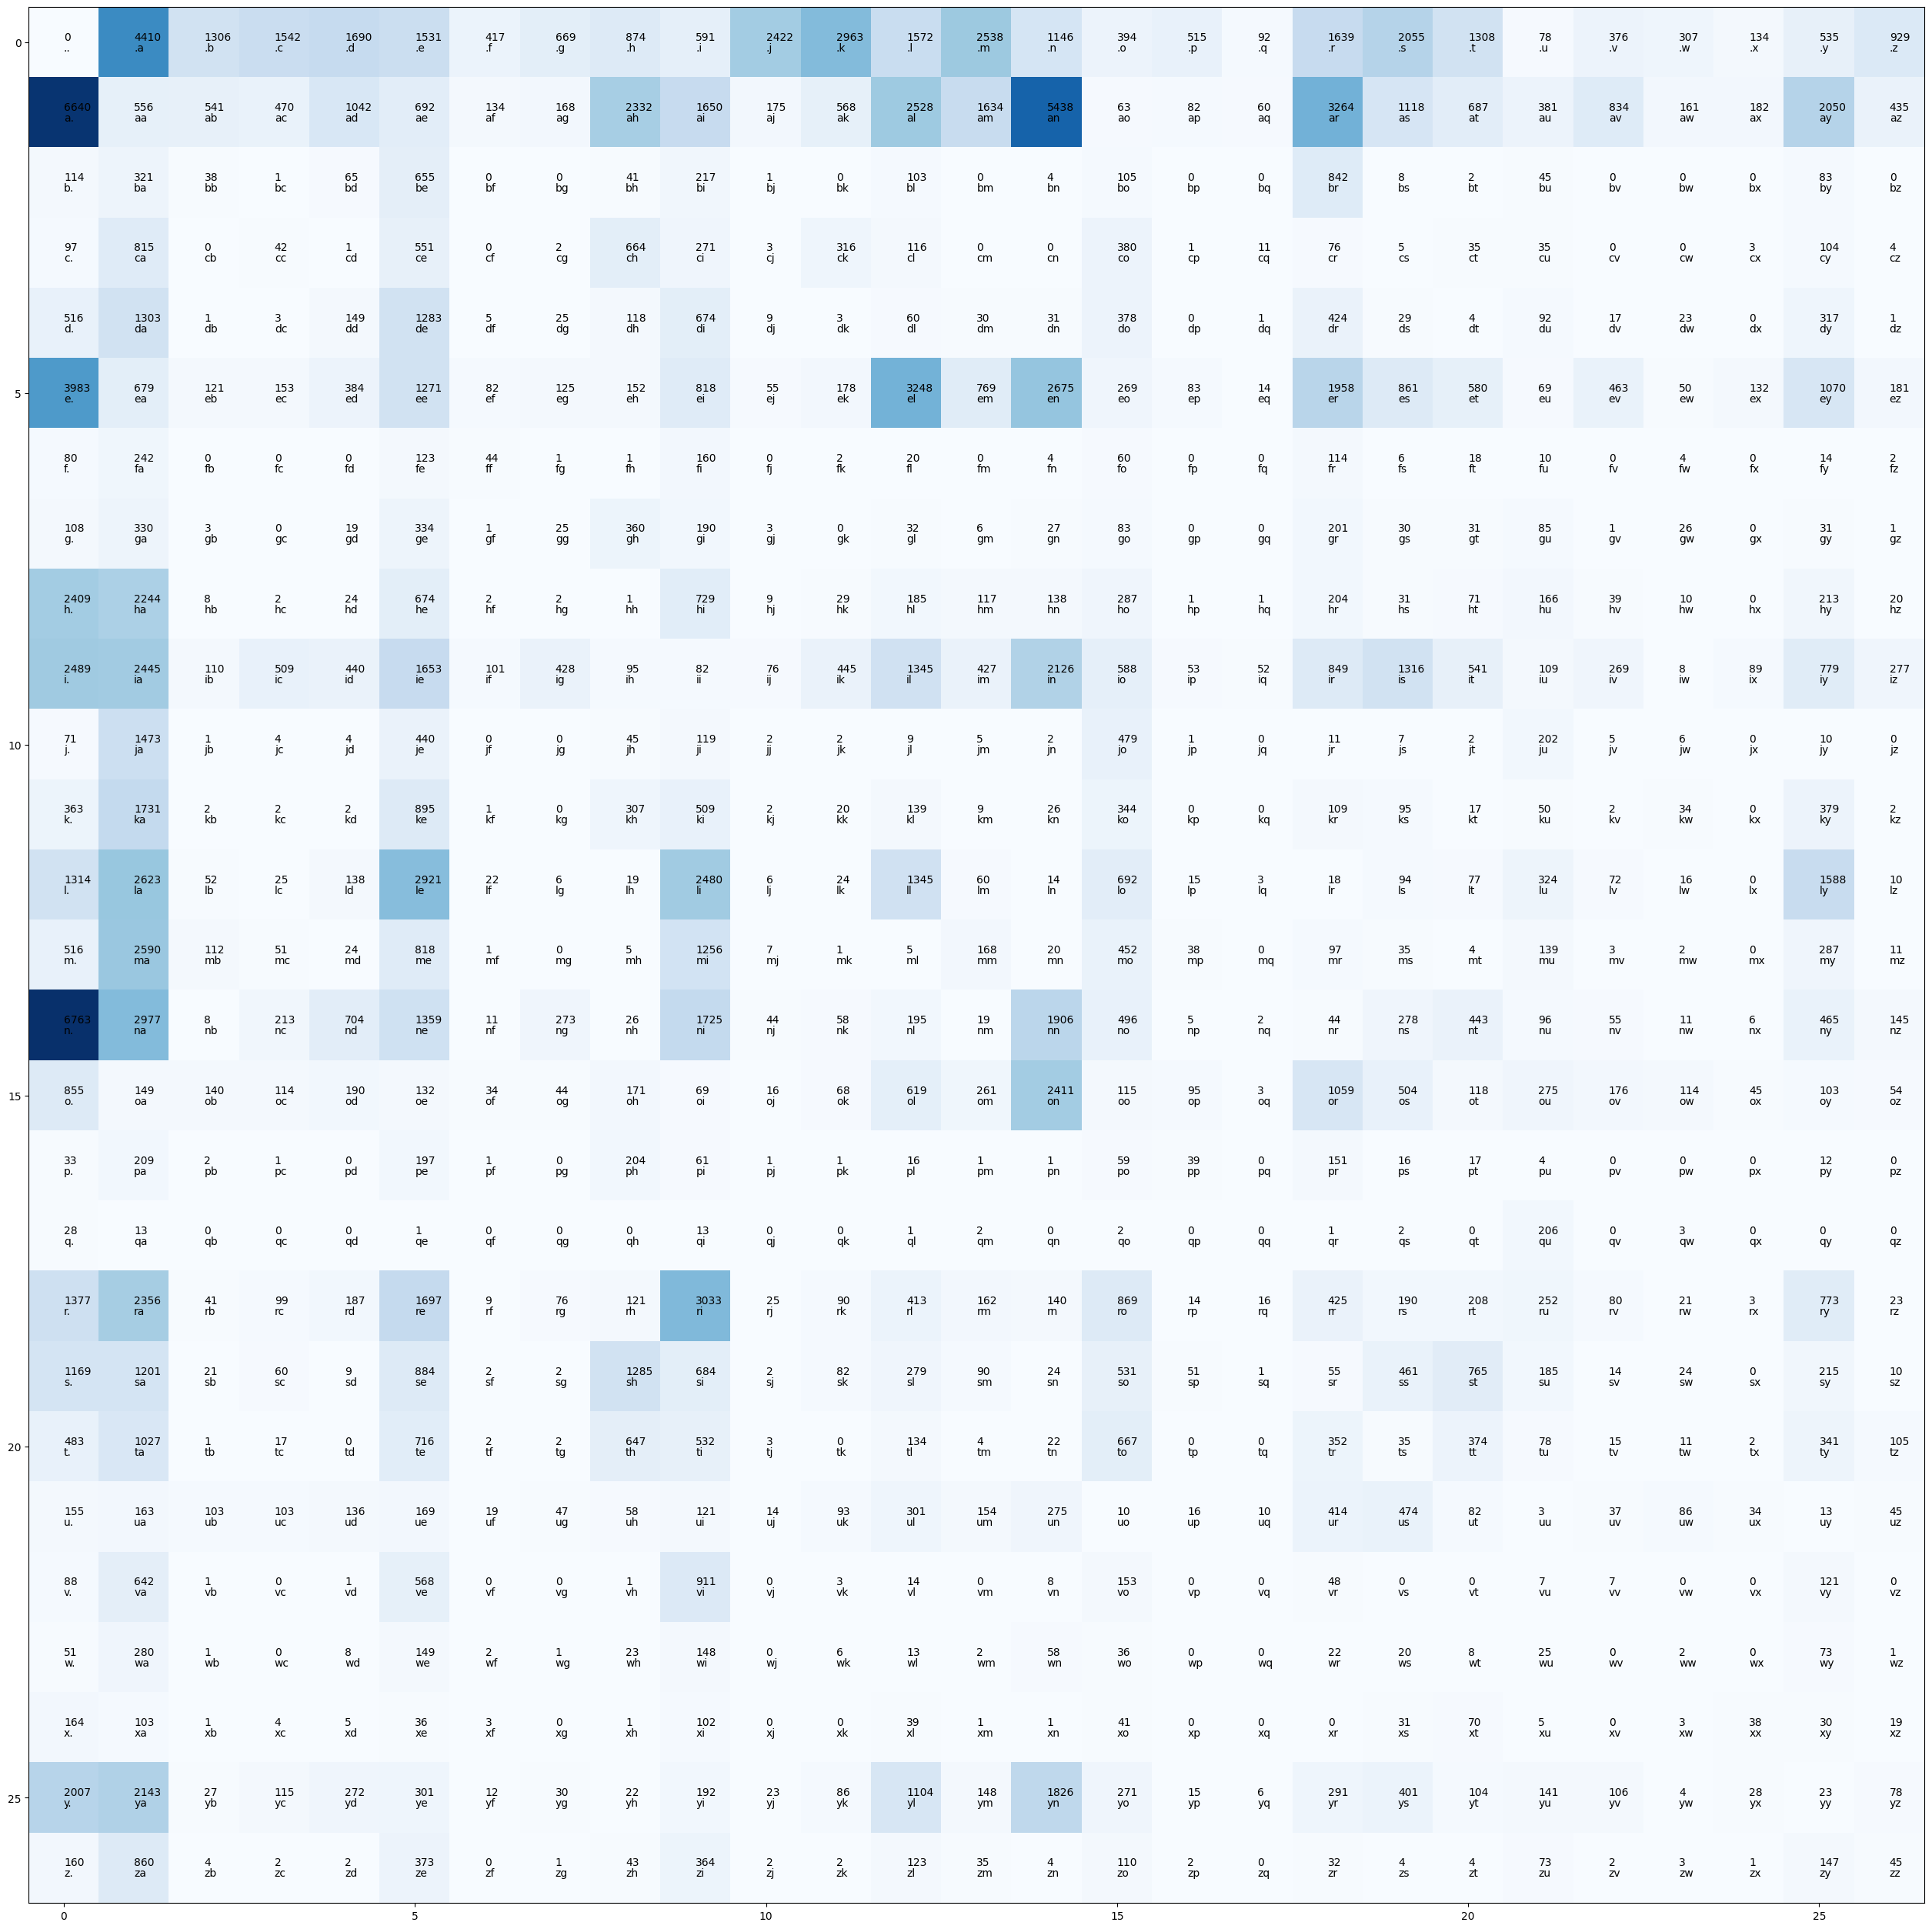

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32,32))
plt.imshow(data, cmap='Blues')
for i in range(27):
  for j in range(27):
    plt.text(j, i, itos[i] + itos[j], va='top')
    plt.text(j, i, data[i, j].item(), va='bottom')

In [9]:
#normalize the counts to get probabilities
data = data+1
prob = data.float()
prob = prob / prob.sum(1, keepdim=True)

In [10]:
ix = 0
pred = []
while True:
  prob = data[ix].float()
  ix = torch.multinomial(prob, 1, replacement=True).item()
  pred.append(itos[ix])
  if ix == 0:
    break

In [11]:
pred = ''.join(pred[:-1])
pred

'jaloderimpocan'

In [12]:
#Loss function (negative log likelihood)
i = 0
like = 0.0

prob = data.float()
prob = prob / prob.sum(1, keepdim=True)
prob

for word in words:
  chars = ['.'] + list(word) + ['.']
  for char1, char2 in zip(chars, chars[1:]):
    ix1 = stoi[char1]
    ix2 = stoi[char2]
    _prob = prob[ix1, ix2]
    log_prob = torch.log(_prob)
    like += log_prob
    i += 1

negative_log_likelihood = - like/i

In [13]:
#Goal: to minimize negative log likelihood
negative_log_likelihood

tensor(2.4544)

# Neural Network

In [130]:
x_train = []
y_train = []
for word in words:
  chars = ['.'] + list(word) + ['.']
  for char1, char2 in zip(chars, chars[1:]):
    ix1 = stoi[char1]
    ix2 = stoi[char2]
    x_train.append(ix1)
    y_train.append(ix2)

In [131]:
#Initializing neurons and assigning random weights
W = torch.randn(27, 27, requires_grad=True)
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
count = x_train.numel()

In [134]:
import torch.nn.functional as F
#Neural net operations
for i in range(100):
  x = F.one_hot(x_train, num_classes=27).float()
  #Forward pass through the layer of neurons
  prob = x @ W #logits
  #Softmax activation
  prob = prob.exp()
  prob = prob / prob.sum(1, keepdims=True)
  #Loss function
  loss = -prob[torch.arange(count), y_train].log().mean()
  #Calculate gradient and perform backward pass
  W.grad = None
  loss.backward()
  #Update the weights to reduce the loss
  W.data += -10 * W.grad
  print(loss)

tensor(3.5946, grad_fn=<NegBackward0>)
tensor(3.2638, grad_fn=<NegBackward0>)
tensor(3.0562, grad_fn=<NegBackward0>)
tensor(2.9352, grad_fn=<NegBackward0>)
tensor(2.8553, grad_fn=<NegBackward0>)
tensor(2.7965, grad_fn=<NegBackward0>)
tensor(2.7513, grad_fn=<NegBackward0>)
tensor(2.7157, grad_fn=<NegBackward0>)
tensor(2.6870, grad_fn=<NegBackward0>)
tensor(2.6636, grad_fn=<NegBackward0>)
tensor(2.6444, grad_fn=<NegBackward0>)
tensor(2.6284, grad_fn=<NegBackward0>)
tensor(2.6149, grad_fn=<NegBackward0>)
tensor(2.6035, grad_fn=<NegBackward0>)
tensor(2.5936, grad_fn=<NegBackward0>)
tensor(2.5850, grad_fn=<NegBackward0>)
tensor(2.5775, grad_fn=<NegBackward0>)
tensor(2.5708, grad_fn=<NegBackward0>)
tensor(2.5648, grad_fn=<NegBackward0>)
tensor(2.5595, grad_fn=<NegBackward0>)
tensor(2.5546, grad_fn=<NegBackward0>)
tensor(2.5501, grad_fn=<NegBackward0>)
tensor(2.5460, grad_fn=<NegBackward0>)
tensor(2.5422, grad_fn=<NegBackward0>)
tensor(2.5387, grad_fn=<NegBackward0>)
tensor(2.5354, grad_fn=<N

In [142]:
#Prediction using the model
ix = 0
pred = []
while True:
  x_pred = torch.tensor([ix])
  x = F.one_hot(x_pred, num_classes=27).float()
  prob = x @ W
  prob = prob.exp()
  prob = prob / prob.sum(1, keepdims=True)

  ix = torch.multinomial(prob, num_samples=1, replacement=True).item()
  pred.append(itos[ix])
  if ix == 0:
    break;
pred

['j', 'o', 'd', 'o', 'n', 'n', 'a', '.']